In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import requests
import time
import os
from serpapi import GoogleSearch
import bs4
from bs4 import BeautifulSoup


In [3]:
npo = pd.read_csv("EDNPOs.csv")

In [4]:
npo = pd.read_csv("EDNPOs.csv")
by_category = npo.Main_Category.value_counts()
by_category = by_category.sort_values(ascending=False)
by_category, len(by_category)

(Main_Category
 Parent Teacher Groups                36173
 Scholarship                          30163
 Single Support Fundraising           28319
 Fraternities                         28120
 Education Services                   20470
 Professional Association             15111
 Fundraising                          10348
 K-12 Schools                          8744
 Alumni Association                    6687
 Student Services                      6000
 Advocacy                              5689
 Adult Education                       5173
 Libraries                             4196
 Preschools                            4040
 Charter Schools                       3044
 Elementary Schools                    2956
 High Schools                          2731
 Special Education                     2625
 Support NEC                           2420
 Remedial Reading                      1849
 Universities                          1707
 Vocational Schools                    1477
 Technical Assist

In [5]:
org = np.array(["Scholarship","Single Support Fundraising","Fundraising","Education Services","Student Services","Advocacy","Research"])
service_org = npo[npo.Main_Category.isin(org)]
len(service_org)/len(npo)

0.4362689559934501

Text(0.5, 1.0, 'Main Category of School Improvement Organizations')

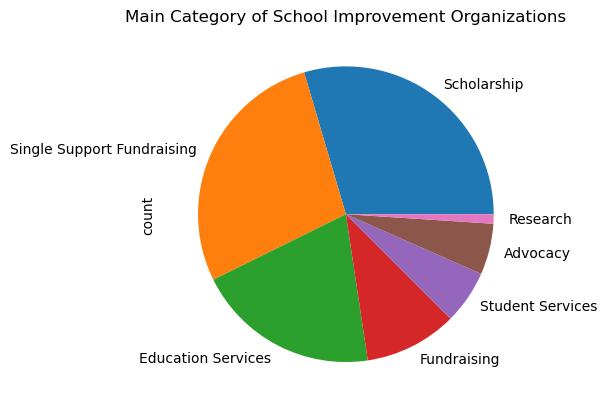

In [6]:
"""Drop first three columns"""
service_org = service_org.drop(columns=[col for col in service_org.columns if "Unnamed" in col])
service_org["Main Category"].value_counts().plot.pie()
"""Set plot title"""
plt.title("Main Category of School Improvement Organizations")

In [ ]:
"""Analysis Here"""


In [ ]:
""""Web search here"""

In [7]:
urls = []
ngos = service_org.name.to_list()[:1000]
print(ngos)
for ngo in ngos:
    search = GoogleSearch({
                "q": ngo + ' mission',
                "api_key": "542403fd8fcb1f09907113113d0e8105485c0b7ee99568bfa63388b3c2af3e26"
            })
    response = search.get_dict()
    response = response['organic_results'][0]['link']
    urls.append(response)
    time.sleep(1)
    print(response)

['NORTHERN MAINE COMMUNITY COLLEGE FOUNDATION', 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN', 'UNIVERSITY OF MAINE FOUNDATION', 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN', 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC', 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC', 'GRANITE EDVANCE CORPORATION', 'UNIVERSITY OF NEW HAMPSHIRE FOUNDATION INCORPORATED', 'DIXON MONTISSORI CHARTER SCHOOL', 'JEAN & RUTH ASELTINE FUND', 'WELLESLEY STUDENTS AID SOCIETY INC', 'THE FRANCIS OUIMET SCHOLARSHIP FUND INC', 'SCHOLARSHIP AMERICA INC', 'DEMOLAY FOUNDATION OF MASSACHUSETTS', 'CHILDRENS CENTER OF WESTON INC', 'SALEM STATE UNIVERSITY ALUMNI ASSOCIATION AND FOUNDATION INC', 'PEIRCE EXTENDED DAY PROGRAM INC', 'LINCOLN EXTENDED ACTIVITIES PROGRAM', 'NELLIE MAE EDUCATION FOUNDATION INC', 'CHARLES E COTTING CHARITABLE CORP', 'DAVIS EDUCATIONAL FOUNDATION', 'PHEMUS CORPORATION', 'THETA DELTA CHI EDUCATIONAL FOUNDATION INC', 'DEMETER HOLDINGS CORPORATION', 'HARVARD MANAGEMENT PRIVATE EQUITY CORPORATION', 'CONCORD

KeyError: 'organic_results'

In [11]:
urls

['https://www.nmcc.edu/beyond-nmcc/support-nmcc/',
 'https://www.aauw.org/about/',
 'https://umainefoundation.org/about-the-foundation/mission-statement/',
 'https://www.aauw.org/about/',
 'https://www.aauw.org/about/',
 'https://www.aauw.org/about/',
 'https://graniteedvance.org/',
 'https://www.unh.edu/give/',
 'http://www.dixonmontessori.org/about-our-school.html',
 'https://www.guidestar.org/Profile/91-1916623',
 'https://www1.wellesley.edu/studentsaid',
 'https://www.ouimet.org/',
 'https://scholarshipamerica.org/',
 'https://www.mademolay.net/en/page.php?id=9',
 'https://www.ccweston.org/',
 'https://www.salemstate.edu/sites/default/files/pdfs/SSUAAF%20Strategic%20Plan%20ONLY_June%202024_printable.pdf',
 'https://peircepto.com/extended-day-edp/',
 'https://www.lincolnextendedday.org/programs',
 'https://nmefoundation.org/our-strategy/',
 'https://www.causeiq.com/organizations/charles-e-cotting-charitable-corporation,042767464/',
 'https://www.davisfoundations.org/def',
 'https://

In [12]:
"""Create a csv file to store the searches"""
result_data = {
    "Organization Name": ngos[:len(urls)],
    "URL": urls
}
urls = pd.DataFrame(result_data)

# Save the DataFrame to a CSV file
urls.to_csv("organizations_urls.csv", index=False)


In [14]:
"""result: successfully getting urls """
urls

,Organization Name,URL
0,NORTHERN MAINE COMMUNITY COLLEGE FOUNDATION,https://www.nmcc.edu/beyond-nmcc/support-nmcc/
1,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,https://www.aauw.org/about/
2,UNIVERSITY OF MAINE FOUNDATION,https://umainefoundation.org/about-the-foundat...
3,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,https://www.aauw.org/about/
4,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,https://www.aauw.org/about/
...,...,...
60,CLEMENTINE LOCKWOOD PETERSON FOUNDATION,https://www.guidestar.org/profile/06-6377136
61,FACULTY-STUDENT ASSOC OF STATE UNIVERSITY OF N...,https://www.stonybrook.edu/commcms/aux/
62,CLASP CHILDRENS CENTER INC,https://www.claspinc.org/missionstatement.htm
63,MANHASSET AFTER SCHOOL EXPERIENCE INC,https://manhassetafterschoolxperience.org/


In [28]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
}
keywords = ["mission", "vision", "values", "goals","purpose","school","schools"]

search_results = []

for url in urls["URL"]:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    page_text = soup.get_text(separator=' ')
    for keyword in keywords:
        if keyword in page_text.lower():
            start_pos = page_text.lower().find(keyword)
            words = page_text[start_pos:].split()[:1000]
            search_results.append(' '.join(words))
            break  
        else:
            search_results.append("No information found")
            break


In [30]:
urls.to_csv("organizations_urls.csv", index=False)

In [27]:
"""add this aas a new column to the csv"""
urls.insert(2, "Search Results", search_results, True)
urls.to_csv("organizations_urls.csv", index=False)

,Organization Name,URL,Search Results
0,NORTHERN MAINE COMMUNITY COLLEGE FOUNDATION,https://www.nmcc.edu/beyond-nmcc/support-nmcc/,missions & Financial Aid Admissions Applicatio...
1,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,https://www.aauw.org/about/,mission Gender Equity & Economic Security We’v...
2,UNIVERSITY OF MAINE FOUNDATION,https://umainefoundation.org/about-the-foundat...,Mission Statement - University of Maine Founda...
3,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,https://www.aauw.org/about/,mission Gender Equity & Economic Security We’v...
4,AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,https://www.aauw.org/about/,mission Gender Equity & Economic Security We’v...
...,...,...,...
60,CLEMENTINE LOCKWOOD PETERSON FOUNDATION,https://www.guidestar.org/profile/06-6377136,Mission To support the Greenwich Library of Gr...
61,FACULTY-STUDENT ASSOC OF STATE UNIVERSITY OF N...,https://www.stonybrook.edu/commcms/aux/,mission of the Stony Brook campus. SBU Eats (M...
62,CLASP CHILDRENS CENTER INC,https://www.claspinc.org/missionstatement.htm,Mission Statement | Programs | General Informa...
63,MANHASSET AFTER SCHOOL EXPERIENCE INC,https://manhassetafterschoolxperience.org/,Mission NY State Registered Program Offerings ...
